In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install folium
import folium

In [2]:
df=pd.read_csv('COVID19MEXICO.csv')


"""
Explorar el dataset
desplegar nombres de columnas
tipo de datos
distribucion de NaNs
"""
#desplegando columnas
print(f'Columnas\n{df.columns}')

#desplegando tipos de datos
print(f'\nTipos de datos\n{df.dtypes}')

#desplehando la distribución de NaNs
print(f'\nDistruibucion de los NaNs\n{df.isna().sum(axis=0)}')

Columnas
Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

Tipos de datos
FECHA_ACTUALIZACION      object
ID_REGISTRO              object
ORIGEN                    int64
SECTOR                    int64
ENTIDAD_UM                int64
SEXO                      int64
ENTIDAD_NAC               int64
ENTIDAD_RES               int64
MUNICIPIO_RES             int64
TIPO_PACIEN

In [3]:
#casos confirmados
df2=df[df['CLASIFICACION_FINAL']==3]
casos=df2['ENTIDAD_RES'].value_counts()
casos=casos.sort_index()
df3=pd.DataFrame()
df3['casos']=casos
entidades=["Aguascalientes",
"Baja California",
"Baja California Sur",
"Campeche",
"Coahuila de Zaragoza",
"Colima",
"Chiapas",
"Chihuahua",
"Distrito Federal",
"Durango",
"Guanajuato",
"Guerrero",
"Hidalgo",
"Jalisco",
"México",
"Michoacán de Ocampo",
"Morelos",
"Nayarit",
"Nuevo León",
"Oaxaca",
"Puebla",
"Querétaro",
"Quintana Roo",
"San Luis Potosí",
"Sinaloa",
"Sonora",
"Tabasco",
"Tamaulipas",
"Tlaxcala",
"Veracruz de Ignacio de la Llave",
"Yucatán",
"Zacatecas"]
df3['ENTIDAD_RES']=entidades

In [4]:
geo_url = r'https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json'


m = folium.Map(location=[19.4326, -99.1332], zoom_start= 4, width='100%', height='100%',position='bottomLeft')
folium.Choropleth(
    geo_data=geo_url,
    name='Contagiados COVID 19',
    data=df3,
    columns=['ENTIDAD_RES', 'casos'],
    key_on='feature.properties.name',
    fill_color='Blues', 
    fill_opacity = 0.9,
    line_opacity = 0.2, 
    nan_fill_color = 'white',
    line_color="black", 
    line_weight=1,
    legend_name='Contagiados COVID 19, 2023, México',
).add_to(m)

folium.LayerControl().add_to(m)
m

In [5]:
lista=list(df3.reset_index().nlargest(3, 'casos')['ENTIDAD_RES'])
print(f'Estados con mayor número de contagios:\n{lista}')

Estados con mayor número de contagios:
['Distrito Federal', 'México', 'Nuevo León']


In [6]:
"""Aplicando métodos de Machine Learning"""
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913084 entries, 0 to 913083
Data columns (total 40 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   FECHA_ACTUALIZACION    913084 non-null  object
 1   ID_REGISTRO            913084 non-null  object
 2   ORIGEN                 913084 non-null  int64 
 3   SECTOR                 913084 non-null  int64 
 4   ENTIDAD_UM             913084 non-null  int64 
 5   SEXO                   913084 non-null  int64 
 6   ENTIDAD_NAC            913084 non-null  int64 
 7   ENTIDAD_RES            913084 non-null  int64 
 8   MUNICIPIO_RES          913084 non-null  int64 
 9   TIPO_PACIENTE          913084 non-null  int64 
 10  FECHA_INGRESO          913084 non-null  object
 11  FECHA_SINTOMAS         913084 non-null  object
 12  FECHA_DEF              913084 non-null  object
 13  INTUBADO               913084 non-null  int64 
 14  NEUMONIA               913084 non-null  int64 
 15  

In [8]:
#variablles predictoras
X=df.iloc[:,  [14,15,20,21,22,23,24,25,26,27,28,29]]
#X=df.iloc[:,  [15,20,22,27]]
Y=df.iloc[:, 9]

In [9]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, train_size=0.75, random_state=0)

In [10]:
arbol=DecisionTreeClassifier()
arbol_covid=arbol.fit(X_train, Y_train)

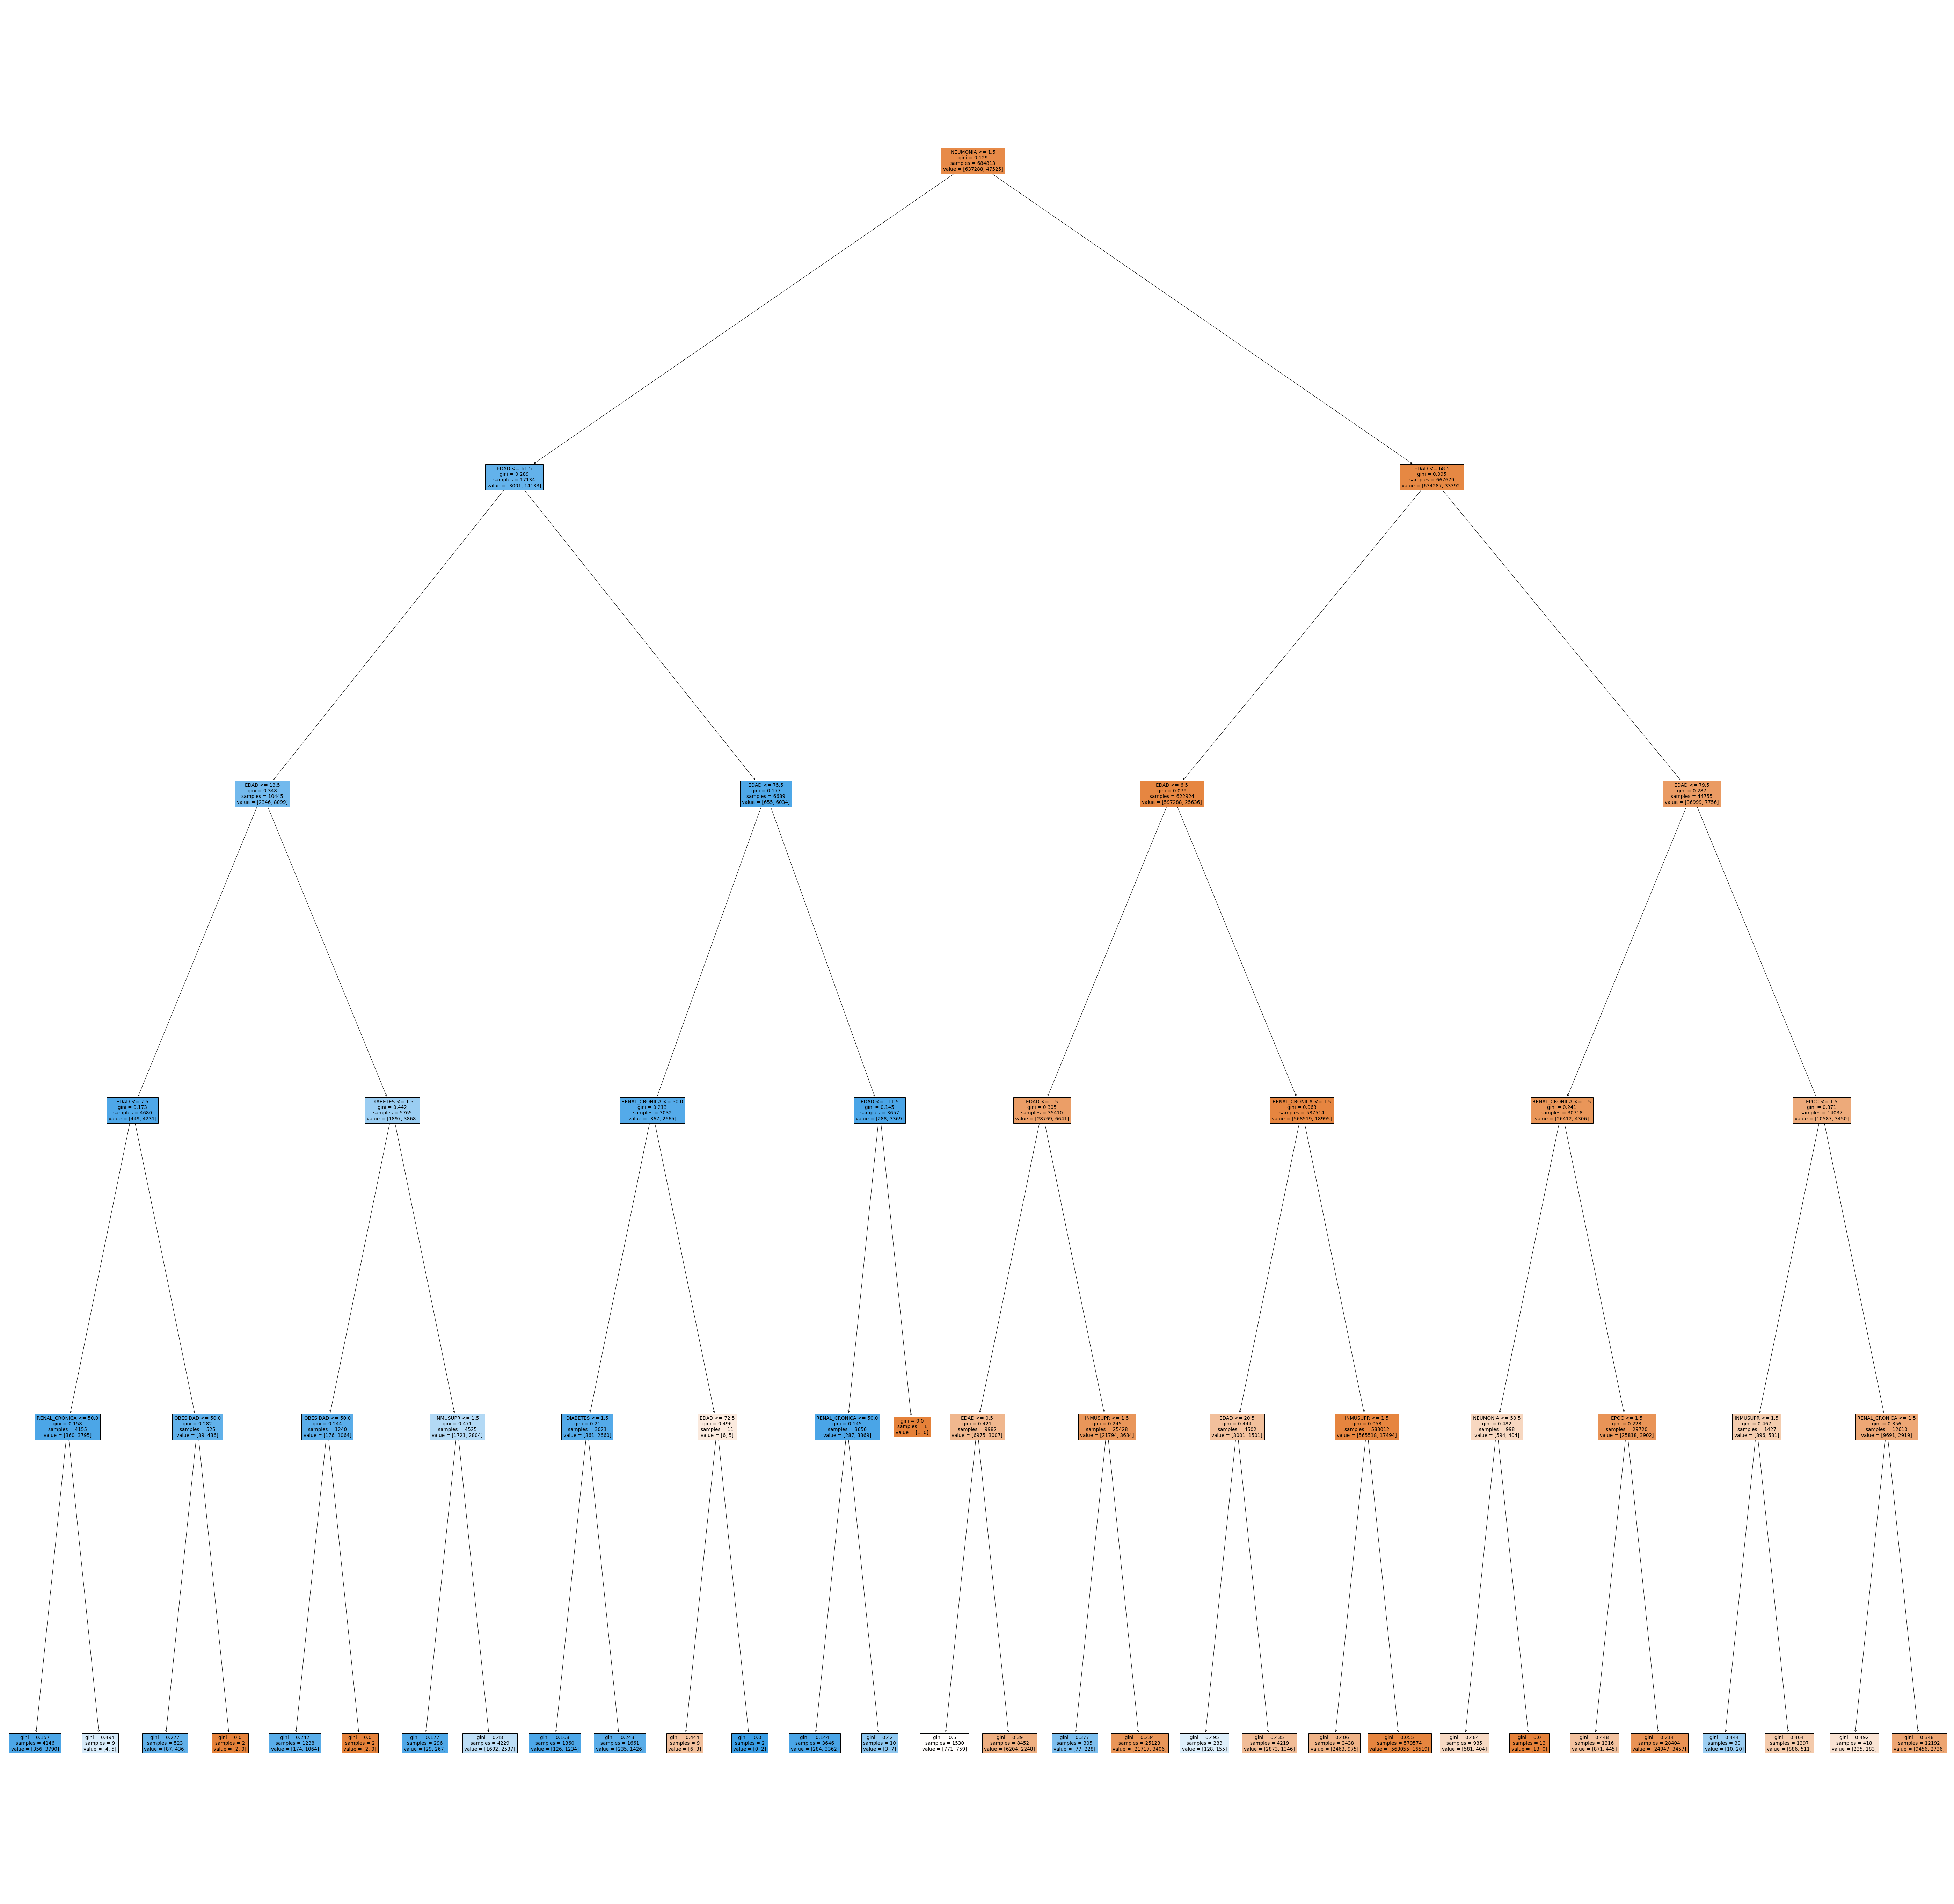

In [193]:
from sklearn import tree
fig=plt.figure(figsize=(100,100))
tree.plot_tree(arbol_covid, feature_names=list(X.columns.values), filled=True)
plt.show()

In [11]:
Y_pred=arbol_covid.predict(X_test)


Score:  0.945490228719373


array([[210969,   1480],
       [ 10963,   4859]], dtype=int64)

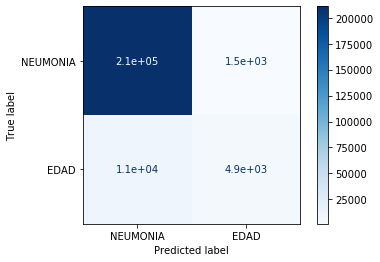

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
Matriz=confusion_matrix(Y_test, Y_pred)
print('Score: ', arbol_covid.score(X_test, Y_test))
ConfusionMatrixDisplay(Matriz, X).plot(cmap=plt.cm.Blues)
Matriz

In [13]:
#precision global
precision=np.sum(Matriz.diagonal())/np.sum(Matriz)
precision

0.945490228719373

In [14]:
#precision por clase
Precision1=Matriz[0,0]/sum(Matriz[0, : ])
Precision1

0.9930336221869719

In [15]:
Precision2=Matriz[1,1]/sum(Matriz[1, : ])
Precision2

0.30710403236000505

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913084 entries, 0 to 913083
Data columns (total 40 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   FECHA_ACTUALIZACION    913084 non-null  object
 1   ID_REGISTRO            913084 non-null  object
 2   ORIGEN                 913084 non-null  int64 
 3   SECTOR                 913084 non-null  int64 
 4   ENTIDAD_UM             913084 non-null  int64 
 5   SEXO                   913084 non-null  int64 
 6   ENTIDAD_NAC            913084 non-null  int64 
 7   ENTIDAD_RES            913084 non-null  int64 
 8   MUNICIPIO_RES          913084 non-null  int64 
 9   TIPO_PACIENTE          913084 non-null  int64 
 10  FECHA_INGRESO          913084 non-null  object
 11  FECHA_SINTOMAS         913084 non-null  object
 12  FECHA_DEF              913084 non-null  object
 13  INTUBADO               913084 non-null  int64 
 14  NEUMONIA               913084 non-null  int64 
 15  

In [54]:
#variablles predictoras
X=df.iloc[:,  [15, 29]]
#X=df.iloc[:,  [15,20,22,27]]
Y=df.iloc[:, 9]
Y

0         1
1         1
2         1
3         1
4         1
         ..
913079    1
913080    1
913081    1
913082    1
913083    1
Name: TIPO_PACIENTE, Length: 913084, dtype: int64

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import preprocessing


le = preprocessing.LabelEncoder()
y=le.fit_transform(Y) # 1D array
X_train, X_test, Y_train, Y_test=train_test_split(X, y, train_size=0.30, random_state=0)

In [65]:
reg_log = LogisticRegression()
reg_log.fit(X_train, Y_train)
y_pred = reg_log.predict(X_test)

In [66]:
print('coef: ', reg_log.coef_)
print('intercept: ', reg_log.intercept_)
print('score: ', reg_log.score(X, y))

coef:  [[0.01213179 0.00635771]]
intercept:  [-3.09112844]
score:  0.9306230313968923


In [67]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [69]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
reg_log = sm.Logit(Y_train, X_train,)
reg_log = reg_log.fit()
print(reg_log.summary())

Optimization terminated successfully.
         Current function value: 0.251670
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               273925
Model:                          Logit   Df Residuals:                   273922
Method:                           MLE   Df Model:                            2
Date:                Thu, 08 Jun 2023   Pseudo R-squ.:                0.007365
Time:                        10:08:15   Log-Likelihood:                -68939.
converged:                       True   LL-Null:                       -69450.
Covariance Type:            nonrobust   LLR p-value:                7.218e-223
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0911      0.018   -169.631      0.000      -3.127      -3.055
EDAD           0.0121      0.

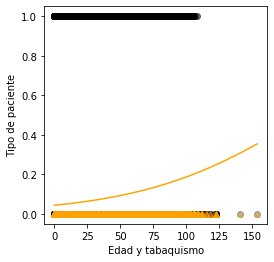

In [70]:
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(X.values, y, 'ok', alpha=0.3)
ax.plot(X_test.values, y_pred, '^', color='orange', ms=6, alpha=0.3)

ax.set_xlabel('Edad y tabaquismo')
ax.set_ylabel('Tipo de paciente')

grid_X = np.linspace(X.min(), X.max(), 100)
grid_X = sm.add_constant(grid_X)
predicciones = reg_log.predict(grid_X)

ax.plot(grid_X[:, 1], predicciones, color = "orange")
plt.show()

In [71]:
#desempeño del algoritmo

def accuracy(TP, TN, FP, FN):
    a = (TP + TN) / (TP + TN + FP + FN)
    return a * 100

def sensibilidad(TP, TN, FP, FN):
    s = TP / (TP + FN)
    return s * 100

def especificidad(TP, TN, FP, FN):
    e = TN / (TN + FP)
    return e * 100

def evaluar_modelo(y_test, y_pred):
    matrix = confusion_matrix(y_test, y_pred)
    (TN, FP, FN, TP) = matrix.ravel()

    print(f"Exactitud: {accuracy(TP, TN, FP, FN)}")
    print(f"Sensibilidad: {sensibilidad(TP, TN, FP, FN)}")
    print(f"Especificidad: {especificidad(TP, TN, FP, FN)}")

In [73]:
m = confusion_matrix(Y_test, y_pred)
m

array([[594976,      0],
       [ 44183,      0]], dtype=int64)

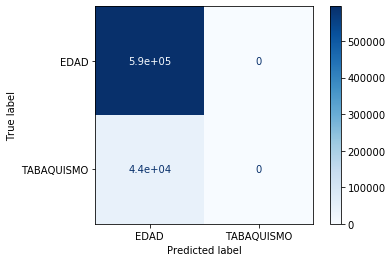

In [76]:
ConfusionMatrixDisplay(m, X).plot(cmap=plt.cm.Blues);

In [78]:
evaluar_modelo(Y_test, y_pred)

Exactitud: 93.08732255980124
Sensibilidad: 0.0
Especificidad: 100.0
